# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [115]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_coords, X_sizes = train['coords'], train['sizes']

print("X train size = ", X_train.shape[0], ", Y train size = ", y_train.shape)
print("X valid size = ", X_valid.shape, ", Y valid size = ", y_valid.shape)
print("X test size = ", X_test.shape, ", Y test size = ", y_test.shape)
print(train.keys())
print("X train coords = ", X_coords[0], ", X train sizes = ", X_sizes[0])
print(y_train[:10])


X train size =  34799 , Y train size =  (34799,)
X valid size =  (4410, 32, 32, 3) , Y valid size =  (4410,)
X test size =  (12630, 32, 32, 3) , Y test size =  (12630,)
dict_keys(['sizes', 'features', 'labels', 'coords'])
X train coords =  [ 6  5 21 20] , X train sizes =  [26 25]
[41 41 41 41 41 41 41 41 41 41]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [116]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.mean(X_sizes, axis=0)

# TODO: How many unique classes/labels there are in the dataset.
classes = set(y_train)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number pf validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("classes = ", classes)

Number of training examples = 34799
Number pf validation examples =  4410
Number of testing examples = 12630
Image data shape = [ 50.97979827  50.45113365]
Number of classes = 43
classes =  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

(34799, 32, 32, 3)
(32, 32, 3)
36 1144
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
[ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]
[ 60 720 750 450 660 630 150 450 450 480 660 420 690 720 270 210 150 360
 390  60  90  90 120 150  90 480 180  60 150  90 150 270  60 210 120 390
 120  60 690  90  90  60  90]
[ 270 2940 3000 1860 2640 2490  570 1890 1860 1950 2670 1740 2790 2880 1050
  840  570 1470 1590  270  450  420  510  660  360 1980  780  300  690  360
  600 1050  300  899  540 1590  510  270 2760  390  450  300  330]
(34799,)


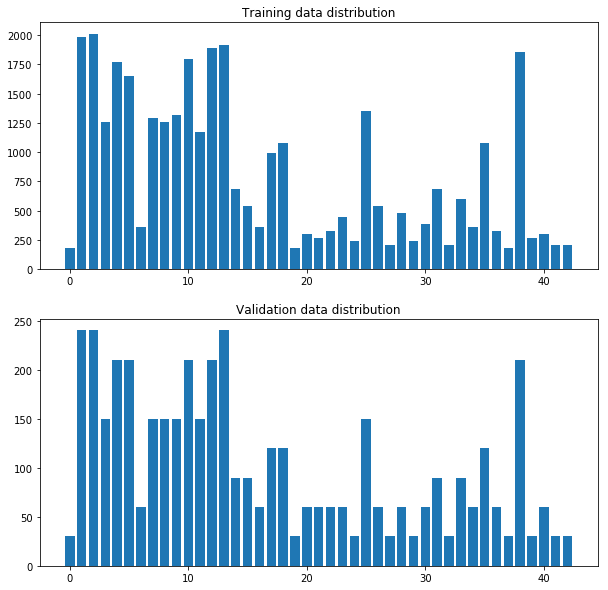

In [117]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
# Visualizations will be shown in the notebook.
%matplotlib inline

index = np.random.randint(0, len(X_train))
print(X_train.shape)
image = X_train[index].squeeze()

#plt.figure(figsize=(1,1))
#plt.imshow(image)
print(image.shape)
print(y_train[index], index)
#print(image)


frequency1 = np.bincount(y_train)
print(frequency1)

frequency2 = np.bincount(y_valid)
print(frequency2)

frequency3 = np.bincount(y_test)
print(frequency3)

print(frequency1+frequency2+frequency3)

print(y_train.shape)
plt.figure(figsize = (10, 10))
plt.subplot(2, 1, 1)
plt.bar(range(43), frequency1)
plt.title('Training data distribution')
#plt.show()

plt.subplot(2, 1, 2)
plt.bar(range(43), frequency2)
plt.title('Validation data distribution')
#plt.show()

plt.show()

meanBinSize = np.mean(frequency1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(34799, 32, 32, 1)
(32, 32, 1)
float64
(34799, 32, 32, 1)


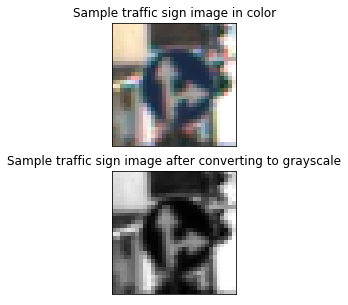

In [118]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
gray_train = color.rgb2gray(X_train)[:, :, :, np.newaxis]
gray_valid = color.rgb2gray(X_valid)[:, :, :, np.newaxis]
gray_test = color.rgb2gray(X_test)[:, :, :, np.newaxis]
#plt.figure(figsize=(1,1))
#plt.imshow(gray_img)
print(gray_train.shape)

gray_img = gray_train[index]
print(gray_img.shape)
plt.figure(figsize=(10,10))
#plt.imshow(gray_img[:, :, 0], cmap='gray')
print(gray_train.dtype)
print(gray_train.shape)
#print(gray_img)

plt.figure(figsize = (5, 5))

plt.subplot(2, 1, 1)
plt.imshow(image)
plt.xticks([], [])
plt.yticks([], [])
plt.title('Sample traffic sign image in color')

plt.subplot(2, 1, 2)
plt.imshow(gray_img[:, :, 0], cmap='gray')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Sample traffic sign image after converting to grayscale')


plt.show()




In [119]:
from scipy import ndimage

rotationAngleArray = np.array([-20, -15, -10, 10, 15, 20])

#image_copy = color.rgb2gray(image)
originalImage = gray_img.copy()
augmentedImage = gray_img.copy()

for signClass in classes:
    numberOfImagesNeeded = meanBinSize*1.8 - frequency1[signClass]
    if (numberOfImagesNeeded > 0):
        # start augmenting images for this class. Fetch the indices in the training array that belong to this class
        imageIndices = np.where(y_train == signClass)
        augmentedImages = []
        labelsForAugmentedImages = []
        
        for i in np.arange(numberOfImagesNeeded):
            # Pick a random index for the image in the class
            imageIndex = imageIndices[0][np.random.randint(0, len(imageIndices[0]))]
            
            # get the image using the random index, for the signClass
            originalImage = gray_train[imageIndex]
            
            # Augment the image
            randomAngle = rotationAngleArray[np.random.randint(0, len(rotationAngleArray))]
            augmentedImage = ndimage.rotate(originalImage, randomAngle, reshape=False)
            
            # append the image and its label into respective temporary arrays
            augmentedImages.append(augmentedImage)
            labelsForAugmentedImages.append(signClass)
        print(np.array(augmentedImages).shape, len(labelsForAugmentedImages), gray_train.shape)
        y_train = np.append(y_train, np.array(labelsForAugmentedImages), axis = 0)
        gray_train = np.append(gray_train, np.array(augmentedImages), axis = 0)
        print(gray_train.shape, y_train.shape, numberOfImagesNeeded)

print(originalImage.shape, augmentedImage.shape)
    


(1277, 32, 32, 1) 1277 (34799, 32, 32, 1)
(36076, 32, 32, 1) (36076,) 1276.70232558
(197, 32, 32, 1) 197 (36076, 32, 32, 1)
(36273, 32, 32, 1) (36273,) 196.702325581
(1097, 32, 32, 1) 1097 (36273, 32, 32, 1)
(37370, 32, 32, 1) (37370,) 1096.70232558
(167, 32, 32, 1) 167 (37370, 32, 32, 1)
(37537, 32, 32, 1) (37537,) 166.702325581
(197, 32, 32, 1) 197 (37537, 32, 32, 1)
(37734, 32, 32, 1) (37734,) 196.702325581
(137, 32, 32, 1) 137 (37734, 32, 32, 1)
(37871, 32, 32, 1) (37871,) 136.702325581
(287, 32, 32, 1) 287 (37871, 32, 32, 1)
(38158, 32, 32, 1) (38158,) 286.702325581
(767, 32, 32, 1) 767 (38158, 32, 32, 1)
(38925, 32, 32, 1) (38925,) 766.702325581
(917, 32, 32, 1) 917 (38925, 32, 32, 1)
(39842, 32, 32, 1) (39842,) 916.702325581
(1097, 32, 32, 1) 1097 (39842, 32, 32, 1)
(40939, 32, 32, 1) (40939,) 1096.70232558
(467, 32, 32, 1) 467 (40939, 32, 32, 1)
(41406, 32, 32, 1) (41406,) 466.702325581
(377, 32, 32, 1) 377 (41406, 32, 32, 1)
(41783, 32, 32, 1) (41783,) 376.702325581
(1277, 32,

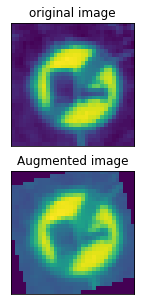

In [120]:
plt.figure(figsize=(5, 5))
plt.subplot(2, 1, 1)
plt.imshow(originalImage[:, :, 0])
plt.xticks([], [])
plt.yticks([], [])
plt.title('original image')
#plt.show()

plt.subplot(2, 1, 2)
plt.imshow(augmentedImage[:, :, 0])
plt.xticks([], [])
plt.yticks([], [])
plt.title('Augmented image')
#plt.show()

plt.show()

[1457 1980 2010 1457 1770 1650 1457 1457 1457 1457 1800 1457 1890 1920 1457
 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457 1457
 1457 1457 1457 1457 1457 1457 1457 1457 1860 1457 1457 1457 1457]
(65875,)


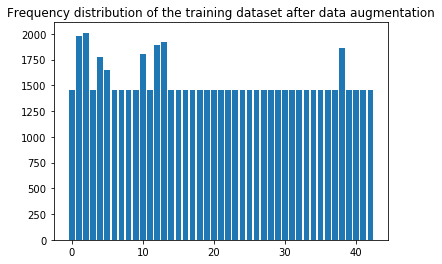

In [121]:
from sklearn.utils import shuffle

gray_train, y_train = shuffle(gray_train, y_train)

frequency1 = np.bincount(y_train)
print(frequency1)

print(y_train.shape)
plt.subplot(1, 1, 1)
plt.bar(range(43), frequency1)
plt.title('Frequency distribution of the training dataset after data augmentation')
plt.show()


### Model Architecture

In [48]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros([6,]))
    # TODO: Set the stride for each dimension (batch_size, height, width, depth)
    strides = [1, 1, 1, 1]
    # TODO: set the padding, either 'VALID' or 'SAME'.
    padding = 'VALID'
    # https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#conv2d
    # `tf.nn.conv2d` does not include the bias computation so we have to add it ourselves after.
    layer1 = tf.nn.conv2d(x, conv1_W, strides, padding) + conv1_b

    # TODO: Activation.
    layer1 = tf.nn.relu(layer1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    layer1 = tf.nn.max_pool(layer1, [1, 2, 2, 1], [1, 2, 2, 1], padding=padding)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros([16,]))
    strides = [1, 1, 1, 1]
    layer2 = tf.nn.conv2d(layer1, conv2_W, strides, padding) + conv2_b
    
    # TODO: Activation.
    layer2 = tf.nn.relu(layer2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2 = tf.nn.max_pool(layer2, [1, 2, 2, 1], [1, 2, 2, 1], padding=padding)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    layer3 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    layer3 = tf.nn.relu(layer3)
    
    layer3 = tf.nn.dropout(layer3, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    layer4 = tf.matmul(layer3, fc2_W) + fc2_b
    
    # TODO: Activation.
    layer4 = tf.nn.relu(layer4)
    layer4 = tf.nn.dropout(layer4, keep_prob)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(layer4, fc3_W) + fc3_b
    return logits, fc1_W, fc2_W, fc3_W

In [49]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)



In [50]:
rate = 0.0005
#rate = 0.0001
lambda_reg = 0.0005 # regularization parameter

logits, fc1_W, fc2_W, fc3_W = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + \
    lambda_reg * (tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W)) 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [51]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples, total_loss / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training... 65875  examples

EPOCH 1 ...
Validation Accuracy = 0.596

EPOCH 2 ...
Validation Accuracy = 0.756



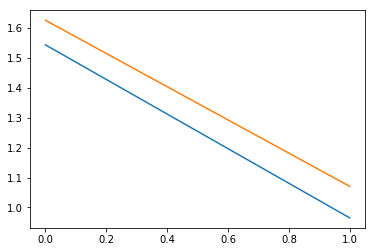

EPOCH 3 ...
Validation Accuracy = 0.817

EPOCH 4 ...
Validation Accuracy = 0.853



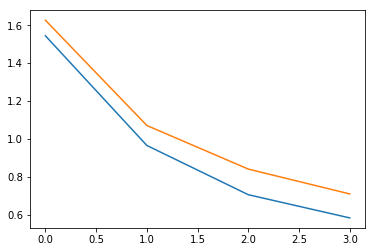

EPOCH 5 ...
Validation Accuracy = 0.875

EPOCH 6 ...
Validation Accuracy = 0.881



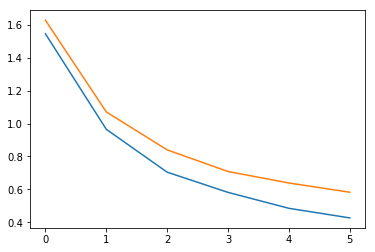

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.912



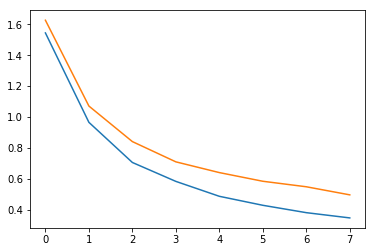

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.918



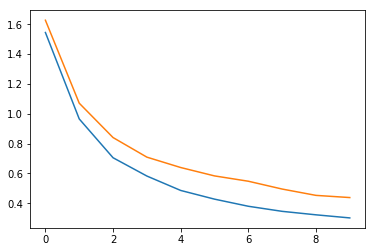

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.930



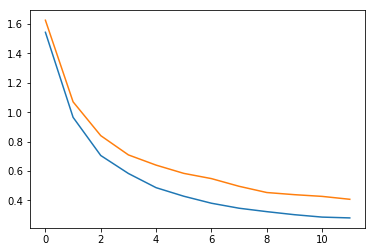

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.939



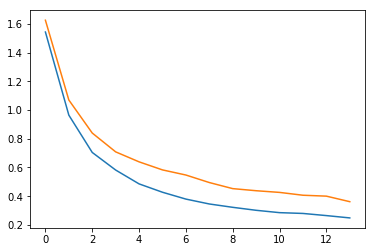

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.940



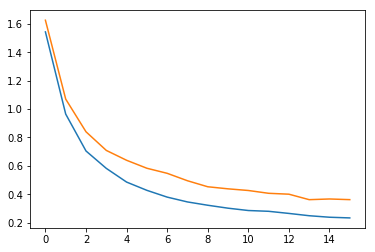

EPOCH 17 ...
Validation Accuracy = 0.948

EPOCH 18 ...
Validation Accuracy = 0.949



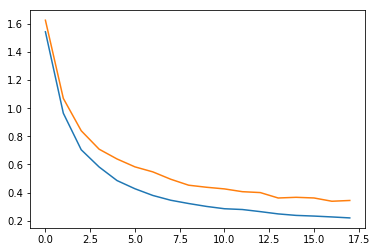

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 20 ...
Validation Accuracy = 0.947



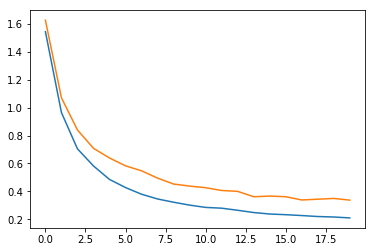

EPOCH 21 ...
Validation Accuracy = 0.948

EPOCH 22 ...
Validation Accuracy = 0.946



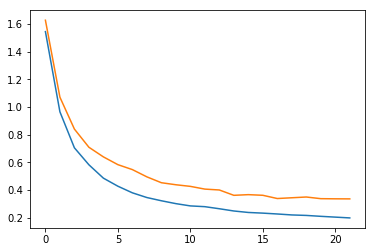

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accuracy = 0.954



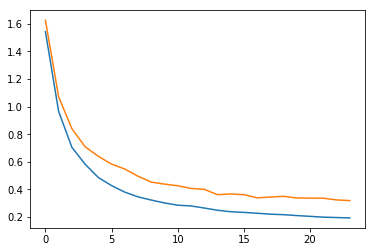

EPOCH 25 ...
Validation Accuracy = 0.951

EPOCH 26 ...
Validation Accuracy = 0.953



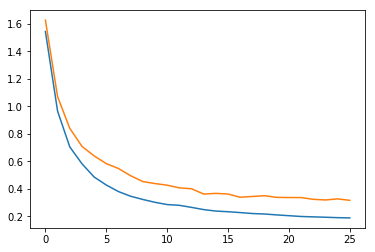

EPOCH 27 ...
Validation Accuracy = 0.953

EPOCH 28 ...
Validation Accuracy = 0.954



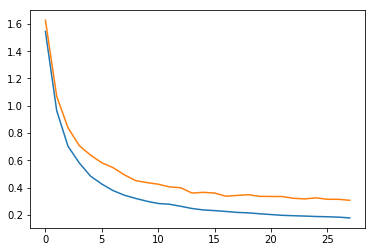

EPOCH 29 ...
Validation Accuracy = 0.951

EPOCH 30 ...
Validation Accuracy = 0.953



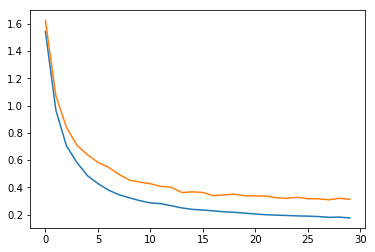

EPOCH 31 ...
Validation Accuracy = 0.959

EPOCH 32 ...
Validation Accuracy = 0.954



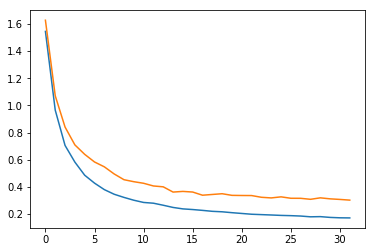

EPOCH 33 ...
Validation Accuracy = 0.957

EPOCH 34 ...
Validation Accuracy = 0.958



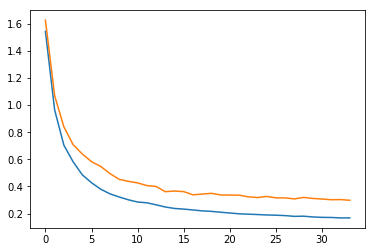

EPOCH 35 ...
Validation Accuracy = 0.958

EPOCH 36 ...
Validation Accuracy = 0.956



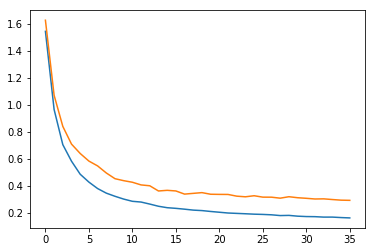

EPOCH 37 ...
Validation Accuracy = 0.954

EPOCH 38 ...
Validation Accuracy = 0.963



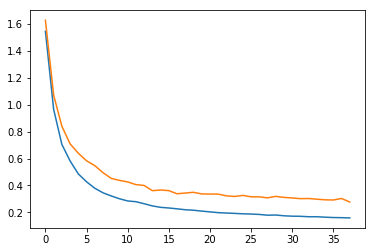

EPOCH 39 ...
Validation Accuracy = 0.958

EPOCH 40 ...
Validation Accuracy = 0.959



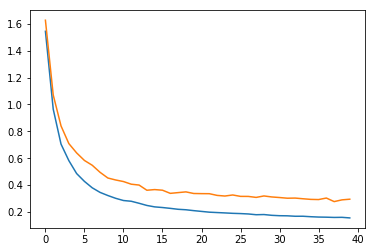

Model saved


In [52]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(gray_train)
    
    print("Training...", num_examples, " examples")
    print()
    training = []
    validation = []
    t_loss = []
    v_loss = []
    for i in range(EPOCHS):
        gray_train, y_train = shuffle(gray_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = gray_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy, training_loss = evaluate(gray_train, y_train)
        validation_accuracy, validation_loss = evaluate(gray_valid, y_valid)
        training.append(training_loss)
        validation.append(validation_loss)
        t_loss.append(training_accuracy)
        v_loss.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
 
#        if (i+1) % 5 == 0:
#            rate = rate / 5
#            print ("changing learning rate to ... {:.6f}".format(rate))

        if (i+1) % 2 == 0:
            plt.plot(range(i+1), training)
            plt.plot(range(i+1), validation)
            plt.show()
    saver.save(sess, './lenet')
    print("Model saved")

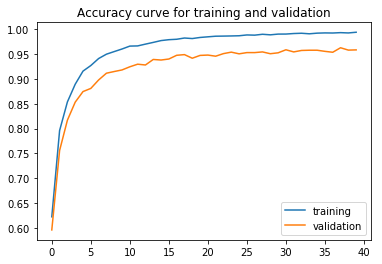

In [122]:
    plt.plot(range(EPOCHS), t_loss, label="training")
    plt.plot(range(EPOCHS), v_loss, label="validation")
    plt.legend()
    plt.title('Accuracy curve for training and validation')
    plt.show()

In [55]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, testing_loss = evaluate(gray_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

43
(43,)
['web_images/70limit.png', 'web_images/rightofway.png', 'web_images/nopassing.png', 'web_images/childrencrossing.png', 'web_images/stop.png']


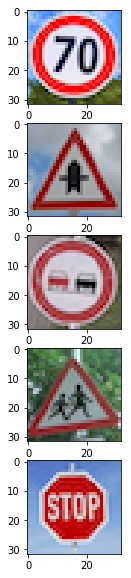

In [70]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import csv
import glob

with open('signnames.csv') as csvfile:
    signfile = csv.reader(csvfile)
    signs = []
    for row in signfile:
        signs.append(row)

    signsArray = np.array(signs[1:])
    
    classnames = signsArray[:, 1]
    print(len(classnames))
    print(classnames.shape)
    
webImageNames = glob.glob('web_images/*.png')
print(webImageNames)

import matplotlib.image as mpimg

webImages = []
for name in webImageNames:
    image = mpimg.imread(name)
    webImages.append(image)
    
webImages = np.array(webImages)
y_web = np.array([4, 11, 9, 28, 14])

plt.figure(figsize = (10, 10))
for i in np.arange(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(webImages[i])
    
plt.show()



### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

#one_hot_y_web = tf.one_hot(y_web, n_classes)

gray_web = color.rgb2gray(webImages)[:, :, :, np.newaxis]
print(gray_web.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmaxProbabilities = tf.nn.softmax(logits)
    prob = sess.run(softmaxProbabilities, feed_dict={x: gray_web, y: y_web, keep_prob: 1.0})
    predictions = np.argmax(prob, axis = 1)
    print(y_web, predictions)

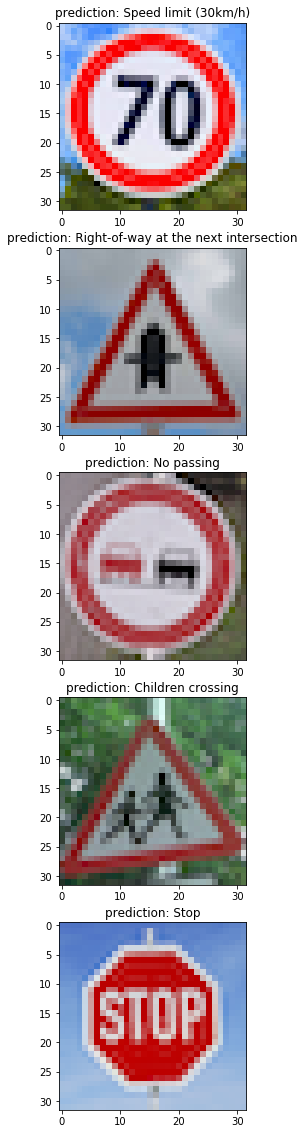

In [123]:
plt.figure(figsize = (10, 20))
for i in np.arange(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(webImages[i])
    plt.title('prediction: '+ classnames[predictions[i]])
    
plt.show()

### Analyze Performance

In [75]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images

accuracy = float(sum(y_web == predictions))/len(y_web)
print("accuracy of detected signs was {:.2f}%".format(accuracy*100))


accuracy of detected signs was 80.00%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [95]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    values = sess.run(tf.nn.top_k(tf.constant(prob), k=5)) 
#    print(values)

predictedProbabilities = values[0]
predictedLabels = values[1]

str = []
for i in range(5):
    str = 'Top predictions for the '+ classnames[y_web[i]] + ' image are '
    for j in range(len(predictedLabels[0])):
        str = str + "{:d}. ".format(j+1) + classnames[predictedLabels[i][j]]+ "({:.2f}), ".format(predictedProbabilities[i][j])
    print(str + '\n')
        

Top predictions for the Speed limit (70km/h) image are 1. Speed limit (30km/h)(0.75), 2. Speed limit (20km/h)(0.24), 3. Speed limit (70km/h)(0.01), 4. Keep right(0.00), 5. Speed limit (50km/h)(0.00), 

Top predictions for the Right-of-way at the next intersection image are 1. Right-of-way at the next intersection(1.00), 2. Beware of ice/snow(0.00), 3. General caution(0.00), 4. Priority road(0.00), 5. Pedestrians(0.00), 

Top predictions for the No passing image are 1. No passing(1.00), 2. Dangerous curve to the left(0.00), 3. End of no passing(0.00), 4. Vehicles over 3.5 metric tons prohibited(0.00), 5. No passing for vehicles over 3.5 metric tons(0.00), 

Top predictions for the Children crossing image are 1. Children crossing(0.60), 2. Right-of-way at the next intersection(0.38), 3. Dangerous curve to the right(0.01), 4. Pedestrians(0.01), 5. Beware of ice/snow(0.00), 

Top predictions for the Stop image are 1. Stop(1.00), 2. Turn right ahead(0.00), 3. Keep left(0.00), 4. Turn left a

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")